# Titanic Survival Prediction 

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Importing data

In [2]:
train_df = pd.read_csv(r'E:\DataPlay\Titanic Survival Prediction\titanic_train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing

### Checking Basic Details

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Missing Values in Age and Cabin Columns

### Checking  Missing Values

In [4]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling Missing values 

#### Unique values in Age Column

In [5]:
train_df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

#### Age Distribution

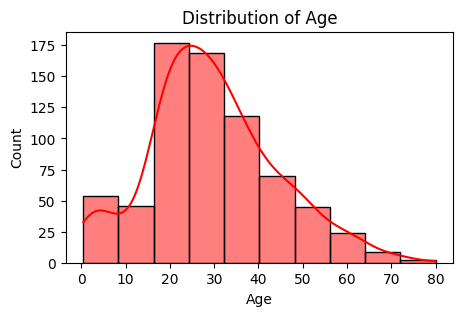

In [6]:
plt.figure(figsize=(5,3))
sns.histplot(train_df['Age'], kde= True, color= 'Red', bins=10)
plt.title('Distribution of Age')
plt.show()

#### Describing Age Column

In [7]:
train_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

- Mean = 29 and Median = 28 which tells that there is a slight skewness.
- We can use Mean imputation for this Age column in this case

#### Checking unique values in cabin column

In [8]:
train_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- As `Cabin` is the categorical column with significant amount of missing values , and it is also not essential 
 for our survival prediction model . So we are dropping this column

#### Dropping Cabin Column

In [9]:
train_df.drop(columns= 'Cabin', inplace= True)

#### Replacing Missing Values in Age Column

In [10]:
age_mean = train_df['Age'].mean()
train_df['Age'].fillna(age_mean, inplace= True)

#### Dropping Rows with Missing Values in Embarked 

In [11]:
train_df.dropna(axis=0, inplace= True)

#### Varifying Missing Values

In [12]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Dropping Duplicate Records

In [13]:
train_df.drop_duplicates(inplace= True)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


### Dropping `PassengerId`, `Ticket` and `Name` Columns

In [15]:
cleaned_df  = train_df.drop(columns= ['PassengerId','Name', 'Ticket'])
cleaned_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Encoding Categorical Features

In [16]:
label_encoding = LabelEncoder()

cleaned_df['Sex'] = label_encoding.fit_transform(cleaned_df['Sex'])
cleaned_df['Embarked'] = label_encoding.fit_transform(cleaned_df['Embarked'])
cleaned_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


- Male = 1
- Female = 0
- C = 0
- Q = 1
- S = 2

## Exploratory Data Analysis

### Statistical Summary

In [17]:
cleaned_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,29.653446,0.524184,0.382452,32.096681,1.535433
std,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761,49.697504,0.792088
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


### Identifying Outliers

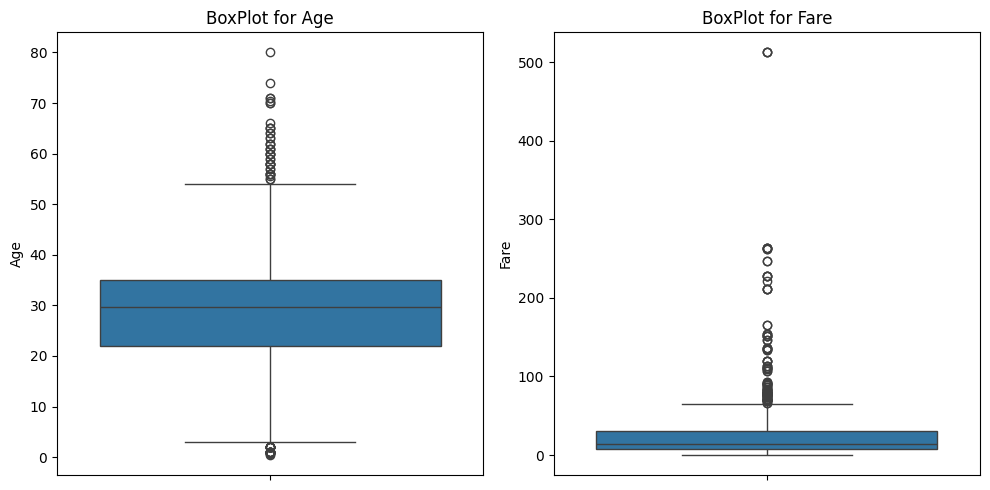

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
for i, col in enumerate(cleaned_df[['Age','Fare']]):
    sns.boxplot(cleaned_df[col], ax=axes[i])
    axes[i].set_title(f'BoxPlot for {col}')
plt.tight_layout()
plt.show()

### Checking Distribution of Variables

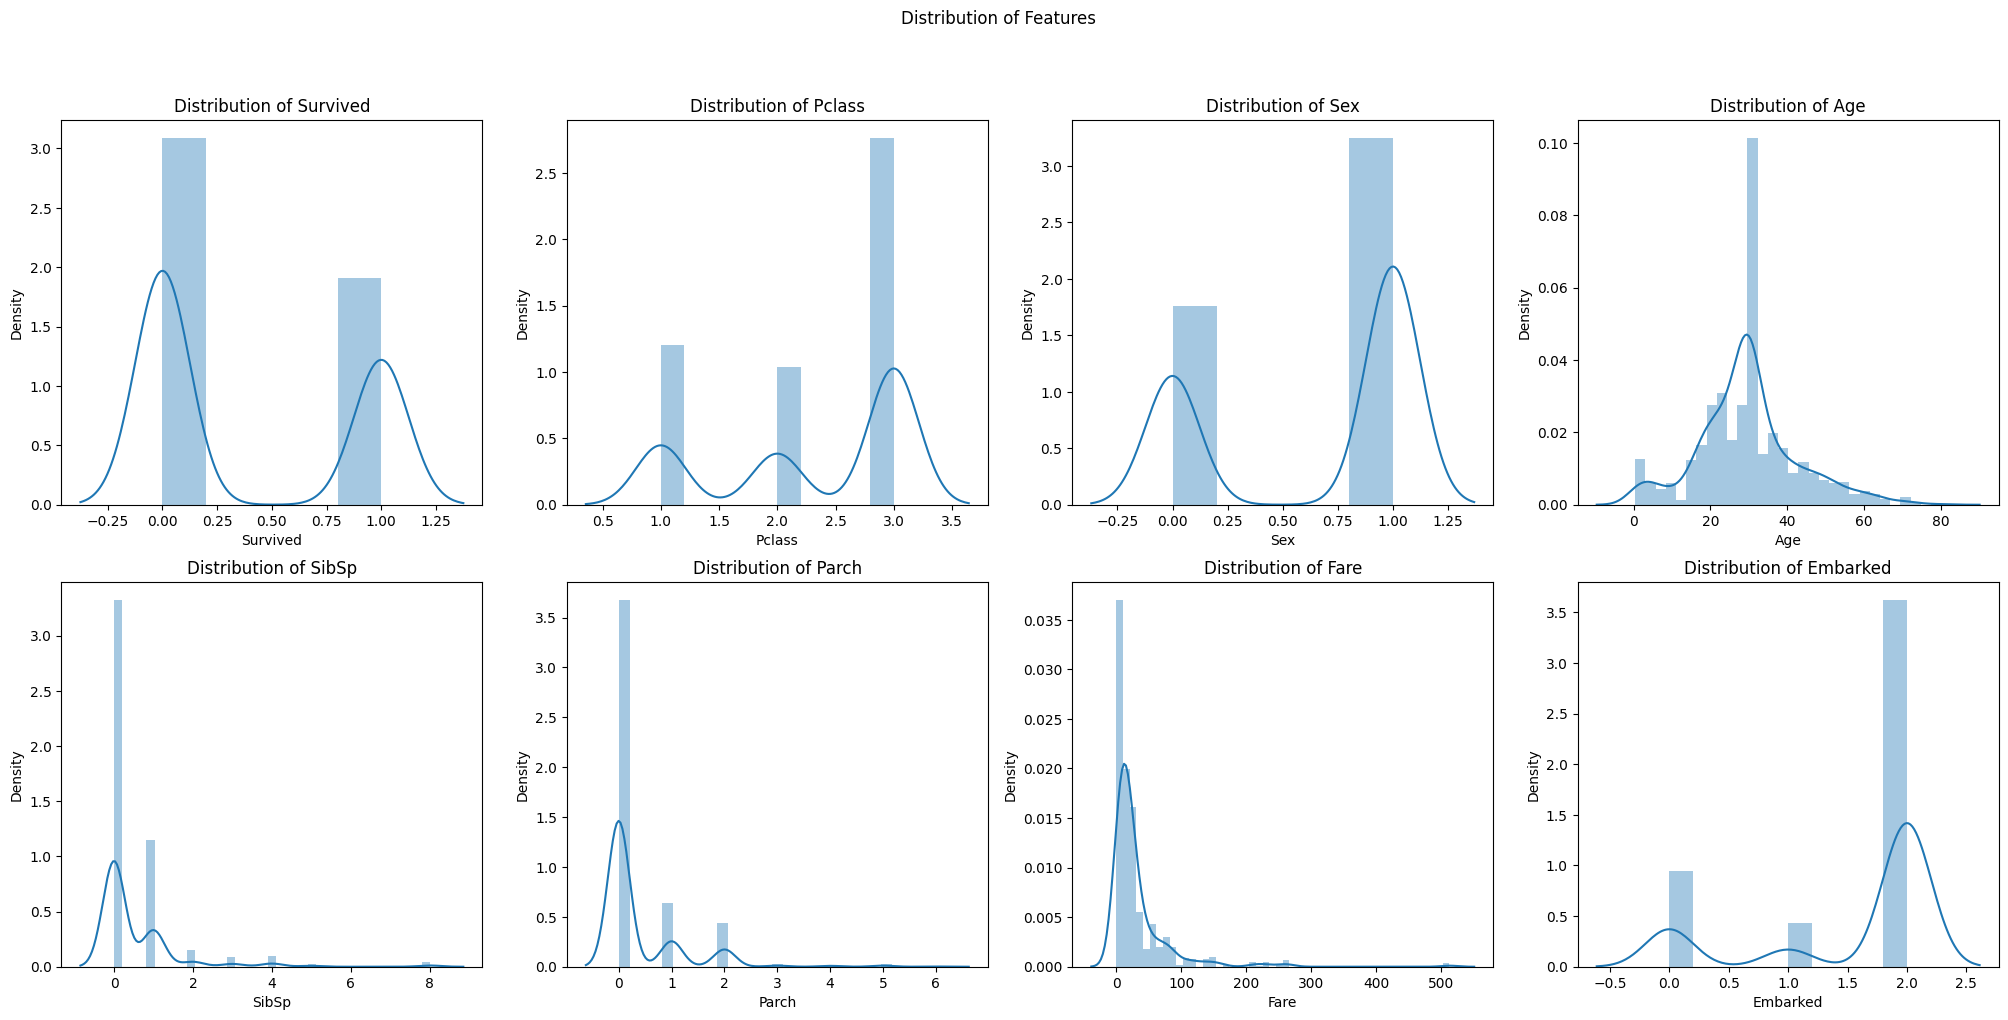

In [19]:
fig, axes = plt.subplots(nrows= 2,ncols=4, figsize= (25,11))
r = 0
c = 0
for col in cleaned_df.columns:
    sns.distplot(cleaned_df[col],hist= True, kde= True, ax= axes[r,c])
    axes[r,c].set_title(f'Distribution of {col}')
    c += 1
    if c== 4:
        c = 0
        r += 1
plt.suptitle('Distribution of Features')
plt.tight_layout
plt.show()


**Key Insights :-**

- **Survived:** The distribution is bimodal, suggesting that the survival outcome is roughly split between two groups.

- **Pclass:** The distribution is multimodal, indicating multiple distinct categories for passenger class, possibly representing different socio-economic classes.

- **Sex:** The distribution is bimodal, suggesting that the gender outcome is roughly split between two groups.

- **Age**: The distribution is right-skewed, suggesting that the majority of passengers were younger, with a few outliers at higher ages.

- **SibSp:** The distribution is right-skewed, showing that most passengers travelled with few siblings or spouses, with a few individuals having a large number.

- **Parch:** The distribution is right-skewed, indicating that most passengers had fewer parents/children, while a few individuals had more.

- **Fare:** The distribution is right-skewed, suggesting that most passengers paid lower fares, with a few individuals paying considerably higher fares.

- **Embarked:** The distribution is left-skewed, indicating that most passengers had embarked from Southampton (S), while a few individuals had embarked from Q and C.

### Correlation Matrix

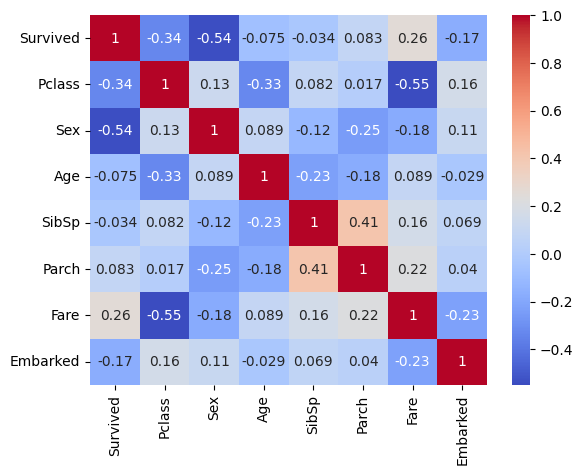

In [20]:
corr_matrix = cleaned_df.corr()

sns.heatmap(corr_matrix, cmap= 'coolwarm',annot= True)
plt.show()

- Highly Correlated Survived and Fare
- SibSp and Parch
- Parch and Fare

## Feature Engineering

### Scaling Features (`Age`, `Fare`)

In [71]:
scale = MinMaxScaler()
cleaned_df['Age'] = scale.fit_transform(cleaned_df[['Age']])
cleaned_df['Fare'] = scale.fit_transform(cleaned_df[['Fare']])
cleaned_df.head()

,Survived,Sex,Age,Fare,Family Size
0,0,1,0.271174,0.014151,2
1,1,0,0.472229,0.139136,2
2,1,0,0.321438,0.015469,1
3,1,0,0.434531,0.103644,2
4,0,1,0.434531,0.015713,1


### Calculating Variance Inflation factor (VIF)

In [70]:
def calculate_vif(df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = cleaned_df.columns
    vif_df['VIF'] = [variance_inflation_factor(cleaned_df.values,i) for i in range(len(cleaned_df.columns))]
    return vif_df

vif_df = calculate_vif(cleaned_df)
vif_df

,Features,VIF
0,Survived,1.761388
1,Sex,2.686723
2,Age,3.738130
3,Fare,1.638229
4,Family Size,1.945950


### Creating New Feature (Family Size)

In [23]:
cleaned_df['Family Size'] = cleaned_df['SibSp']+cleaned_df['Parch']+1
cleaned_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family Size
0,0,3,1,0.271174,1,0,0.014151,2,2
1,1,1,0,0.472229,1,0,0.139136,0,2
2,1,3,0,0.321438,0,0,0.015469,2,1
3,1,1,0,0.434531,1,0,0.103644,2,2
4,0,3,1,0.434531,0,0,0.015713,2,1


### Dropping SibSp and Parch (Because Family size has been created)

In [24]:
cleaned_df = cleaned_df.drop(columns= ['SibSp','Parch'])
cleaned_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family Size
0,0,3,1,0.271174,0.014151,2,2
1,1,1,0,0.472229,0.139136,0,2
2,1,3,0,0.321438,0.015469,2,1
3,1,1,0,0.434531,0.103644,2,2
4,0,3,1,0.434531,0.015713,2,1


### Recalculating VIF

In [25]:
calculate_vif(cleaned_df)

,Features,VIF
0,Survived,1.926587
1,Pclass,6.683737
2,Sex,3.620374
3,Age,4.686179
4,Fare,1.945781
5,Embarked,4.747725
6,Family Size,2.827261


### Finding Feature Importance

In [26]:
features = cleaned_df.drop(columns=['Survived'])
target = cleaned_df['Survived']

m1 = RandomForestClassifier(random_state= 42)
m1.fit(features, target)
feature_importance = m1.feature_importances_
importance_df = pd.DataFrame({'Features' :features.columns, 'Importance' : feature_importance})
importance_df.sort_values(by= 'Importance', ascending= False, ignore_index= True)

,Features,Importance
0,Fare,0.277101
1,Sex,0.264778
2,Age,0.264044
3,Pclass,0.080886
4,Family Size,0.079544
5,Embarked,0.033647


- Lets Drop `Embarked` and `Pclass` because these two have moderate to high VIF with lesser predictive power

### Selecting Top 4 Features

In [27]:
selected_df = cleaned_df
selected_df.drop(columns=['Embarked', 'Pclass'], inplace= True)

In [28]:
calculate_vif(selected_df)

,Features,VIF
0,Survived,1.761388
1,Sex,2.686723
2,Age,3.738130
3,Fare,1.638229
4,Family Size,1.945950


### Checking Class imbalance 

In [29]:
selected_df.Survived.value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

- There is a significant class imbalance

### Handling class Imbalance (Oversampling)

In [30]:
minority_class = selected_df[selected_df['Survived']== 1]
majority_class = selected_df[selected_df['Survived']== 0]

minority_class = resample(minority_class,replace= True, n_samples= len(majority_class))
resample_df = pd.concat([minority_class,majority_class], ignore_index= True)

resample_df.Survived.value_counts()

Survived
1    549
0    549
Name: count, dtype: int64

### Splitting Dataset into Training and Validation Set (without Oversampling)

In [31]:
X = selected_df.drop(columns= ['Survived'])
y = selected_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [32]:
print('X_train Shape = ', X_train.shape)
print('y_train Shape = ', y_train.shape)
print('X_test Sahpe  = ',X_test.shape)
print('y_test shape = ',y_test.shape)

X_train Shape =  (711, 4)
y_train Shape =  (711,)
X_test Sahpe  =  (178, 4)
y_test shape =  (178,)


### Resplitting Data into Training and Validation Set after Oversampling

In [33]:
X_res = resample_df.drop(columns= ['Survived'])
y_res = resample_df['Survived']
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res,y_res, test_size= 0.2, random_state= 42)

In [34]:
print('X_train_Resampled Shape = ', X_train_res.shape)
print('y_train_Resampled Shape = ', y_train_res.shape)
print('X_test_Resampled Sahpe  = ',X_test_res.shape)
print('y_test_Resampled shape = ',y_test_res.shape)

X_train_Resampled Shape =  (878, 4)
y_train_Resampled Shape =  (878,)
X_test_Resampled Sahpe  =  (220, 4)
y_test_Resampled shape =  (220,)


## Model Building

### UDF for model evaluation

In [35]:
def evaluate(model,xtest,ytest):
    predictions = model.predict(xtest)
    print(f'Accuracy = {round(accuracy_score(ytest, predictions),4)}')
    print(f'Precision = {round(precision_score(ytest, predictions),4)}')
    print(f'Recall = {round(recall_score(ytest, predictions),4)}')
    print(f'F1 Score = {round(f1_score(ytest, predictions),4)}')
    print(f'\nClassification Report :-')
    print(classification_report(ytest, predictions))

### Baseline Models

#### Logistic Regression Model (Baseline)

In [36]:
lr_base = LogisticRegression(random_state= 42, class_weight= 'balanced')
lr_base.fit(X_train, y_train)
evaluate(lr_base,X_test,y_test)

Accuracy = 0.8034
Precision = 0.7297
Recall = 0.7826
F1 Score = 0.7552

Classification Report :-
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.73      0.78      0.76        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.80      0.80       178



#### Random Forest Classifier Model (Baseline)

In [37]:
rf_base = RandomForestClassifier(random_state= 42, class_weight= 'balanced')
rf_base.fit(X_train, y_train)
evaluate(rf_base,X_test,y_test)

Accuracy = 0.7978
Precision = 0.7037
Recall = 0.8261
F1 Score = 0.76

Classification Report :-
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       109
           1       0.70      0.83      0.76        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.79       178
weighted avg       0.81      0.80      0.80       178



#### Xgboost classifier Model (Baseline)

In [38]:
xg_base = XGBClassifier(random_state= 42, class_weight= 'balanced')
xg_base.fit(X_train, y_train)
evaluate(xg_base,X_test,y_test)

Accuracy = 0.8315
Precision = 0.7746
Recall = 0.7971
F1 Score = 0.7857

Classification Report :-
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       109
           1       0.77      0.80      0.79        69

    accuracy                           0.83       178
   macro avg       0.82      0.83      0.82       178
weighted avg       0.83      0.83      0.83       178



#### Catboost classifier Model (Baseline)

In [39]:
cb_base = CatBoostClassifier(random_state= 42,class_weights= None, verbose= 0)
cb_base.fit(X_train,y_train)
evaluate(cb_base,X_test,y_test)

Accuracy = 0.8258
Precision = 0.7568
Recall = 0.8116
F1 Score = 0.7832

Classification Report :-
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       109
           1       0.76      0.81      0.78        69

    accuracy                           0.83       178
   macro avg       0.82      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



#### MLP Classifier Model (Baseline)

In [40]:
mlp_base = MLPClassifier(random_state= 42)
mlp_base.fit(X_train,y_train)
evaluate(mlp_base,X_test,y_test)

Accuracy = 0.809
Precision = 0.7536
Recall = 0.7536
F1 Score = 0.7536

Classification Report :-
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.75      0.75      0.75        69

    accuracy                           0.81       178
   macro avg       0.80      0.80      0.80       178
weighted avg       0.81      0.81      0.81       178



### Models After Oversampling

#### Logistic Regression Model (After Oversampling)

In [41]:
lr_res = LogisticRegression(random_state= 42, class_weight= 'balanced')
lr_res.fit(X_train_res, y_train_res)
evaluate(lr_res,X_test_res,y_test_res)

Accuracy = 0.7909
Precision = 0.8687
Recall = 0.7227
F1 Score = 0.789

Classification Report :-
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       101
           1       0.87      0.72      0.79       119

    accuracy                           0.79       220
   macro avg       0.80      0.80      0.79       220
weighted avg       0.80      0.79      0.79       220



#### Random Forest Classifier Model (After Oversampling)

In [42]:
rf_res = RandomForestClassifier(random_state= 42, class_weight= 'balanced')
rf_res.fit(X_train_res, y_train_res)
evaluate(rf_res,X_test_res,y_test_res)

Accuracy = 0.9045
Precision = 0.9016
Recall = 0.9244
F1 Score = 0.9129

Classification Report :-
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       101
           1       0.90      0.92      0.91       119

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



#### Xgboost Classifier Model (After Oversampling)

In [43]:
xg_res = XGBClassifier(random_state= 42, class_weight= 'balanced')
xg_res.fit(X_train_res, y_train_res)
evaluate(xg_res,X_test_res,y_test_res)

Accuracy = 0.8909
Precision = 0.8926
Recall = 0.9076
F1 Score = 0.9

Classification Report :-
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       101
           1       0.89      0.91      0.90       119

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



#### Catboost Classifier Model (After Oversampling)

In [44]:
cb_res = CatBoostClassifier(random_state= 42, class_weights= None, verbose= 0)
cb_res.fit(X_train_res, y_train_res)
evaluate(cb_res,X_test_res,y_test_res)

Accuracy = 0.8545
Precision = 0.9143
Recall = 0.8067
F1 Score = 0.8571

Classification Report :-
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       101
           1       0.91      0.81      0.86       119

    accuracy                           0.85       220
   macro avg       0.86      0.86      0.85       220
weighted avg       0.86      0.85      0.85       220



#### MLP Classifier Model (After Oversampling)

In [45]:
mlp_res = MLPClassifier(random_state= 42)
mlp_res.fit(X_train_res, y_train_res)
evaluate(mlp_res,X_test_res,y_test_res)

Accuracy = 0.7909
Precision = 0.8687
Recall = 0.7227
F1 Score = 0.789

Classification Report :-
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       101
           1       0.87      0.72      0.79       119

    accuracy                           0.79       220
   macro avg       0.80      0.80      0.79       220
weighted avg       0.80      0.79      0.79       220



## Hyperparameter Tunning

#### Logistic Regression Model (Tunned)

In [46]:
# Params for logistic Regression randomizedsearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga','newton-cg','newton-cholesky','lbfgs'],
    'max_iter': [50,100, 200],
    'class_weight': [None, 'balanced']
}
lr = LogisticRegression(random_state= 42)
grid_search_lr = GridSearchCV(estimator= lr, param_grid= param_grid, verbose= 2, n_jobs= -1, cv= 5)
grid_search_lr.fit(X_train_res, y_train_res)

print('Best Parameters :- ',grid_search_lr.best_params_)

tunned_lr = grid_search_lr.best_estimator_

evaluate(tunned_lr,X_test_res,y_test_res)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best Parameters :-  {'C': 1, 'class_weight': None, 'max_iter': 50, 'penalty': 'l2', 'solver': 'saga'}
Accuracy = 0.7909
Precision = 0.8687
Recall = 0.7227
F1 Score = 0.789

Classification Report :-
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       101
           1       0.87      0.72      0.79       119

    accuracy                           0.79       220
   macro avg       0.80      0.80      0.79       220
weighted avg       0.80      0.79      0.79       220



#### Random Forest Classifier Model (Tunned)

In [47]:
# Param grid for random forest classifier
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    }

rf = RandomForestClassifier(random_state= 42)
grid_search_rf = GridSearchCV(estimator= rf, param_grid= param_grid, verbose= 2, n_jobs= -1, cv= 5)
grid_search_rf.fit(X_train_res, y_train_res)

print('Best Parameters :- ',grid_search_rf.best_params_)

tunned_rf = grid_search_rf.best_estimator_

evaluate(tunned_rf,X_test_res,y_test_res)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Parameters :-  {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy = 0.9091
Precision = 0.9024
Recall = 0.9328
F1 Score = 0.9174

Classification Report :-
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       101
           1       0.90      0.93      0.92       119

    accuracy                           0.91       220
   macro avg       0.91      0.91      0.91       220
weighted avg       0.91      0.91      0.91       220



#### Xgboost Classifier Model (Tunned)

In [48]:
# Param grid for Xgboost classifier
param_grid = {
    'n_estimators': [ 50, 100,200,300],   # Number of boosting rounds
    'max_depth': [10,20,30],           # Maximum tree depth
    'learning_rate': [0.01, 0.1,0.2],   # Step size shrinkage
    'colsample_bytree': [0.5, 0.7, 1.0]
}

xgb = XGBClassifier(random_state= 42)
grid_search_xg = GridSearchCV(estimator= xgb, param_grid= param_grid, verbose= 2, n_jobs= -1, cv= 5)
grid_search_xg.fit(X_train_res, y_train_res)

print('Best Parameters :- ',grid_search_xg.best_params_)

tunned_xg = grid_search_xg.best_estimator_

evaluate(tunned_xg,X_test_res,y_test_res)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters :-  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Accuracy = 0.8955
Precision = 0.8871
Recall = 0.9244
F1 Score = 0.9053

Classification Report :-
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       101
           1       0.89      0.92      0.91       119

    accuracy                           0.90       220
   macro avg       0.90      0.89      0.89       220
weighted avg       0.90      0.90      0.90       220



#### Catboost Classifier Model (Tunned)

In [49]:
# Param Grid for Catboost Classifier Model
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [5, 7, 8],
    'iterations': [200, 300, 400],
    'random_strength': [0.1, 0.5, 1.0]
    }

cb = CatBoostClassifier(random_state= 42, verbose= 0)
grid_search_cb = GridSearchCV(estimator= cb, param_grid= param_grid, verbose= 2, n_jobs= -1, cv= 3)
grid_search_cb.fit(X_train_res, y_train_res)

print('Best Parameters :- ',grid_search_cb.best_params_)

tunned_cb = grid_search_cb.best_estimator_

evaluate(tunned_cb,X_test_res,y_test_res)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters :-  {'depth': 7, 'iterations': 400, 'l2_leaf_reg': 5, 'learning_rate': 0.1, 'random_strength': 0.1}
Accuracy = 0.9
Precision = 0.9008
Recall = 0.916
F1 Score = 0.9083

Classification Report :-
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       101
           1       0.90      0.92      0.91       119

    accuracy                           0.90       220
   macro avg       0.90      0.90      0.90       220
weighted avg       0.90      0.90      0.90       220



#### MLP Classifier Model (Tunned)

In [50]:
# Param Grid for MLPClassifier Model
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500, 1000, 2000],
    'batch_size': [10, 50, 100]
}


mlp = MLPClassifier(random_state= 42)
grid_search_mlp = GridSearchCV(estimator= mlp, param_grid= param_grid, verbose= 2, n_jobs= -1, cv= 3)
grid_search_mlp.fit(X_train_res, y_train_res)

print('Best Parameters :- ',grid_search_mlp.best_params_)

tunned_mlp = grid_search_mlp.best_estimator_

evaluate(tunned_mlp,X_test_res,y_test_res)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Parameters :-  {'activation': 'relu', 'batch_size': 50, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1, 'max_iter': 500, 'solver': 'sgd'}
Accuracy = 0.7909
Precision = 0.8687
Recall = 0.7227
F1 Score = 0.789

Classification Report :-
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       101
           1       0.87      0.72      0.79       119

    accuracy                           0.79       220
   macro avg       0.80      0.80      0.79       220
weighted avg       0.80      0.79      0.79       220



## Model Evaluation and Comparison

### UDF for Evaluation Metrics Table

In [73]:
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])

def metrics_table(name, model, xtest, ytest, metrics_df):
    y_pred = model.predict(xtest)
    
    try:
        y_pred_prob = model.predict_proba(xtest)[:, 1]
        auc = roc_auc_score(ytest, y_pred_prob)
    except:
        auc = None

    new_row = pd.DataFrame({
        'Model': [name],
        'Accuracy': [accuracy_score(ytest, y_pred)],
        'Precision': [precision_score(ytest, y_pred)],
        'Recall': [recall_score(ytest, y_pred)],
        'F1-Score': [f1_score(ytest, y_pred)],
        'AUC': [auc]
    })

    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)
    return metrics_df


### Creating Metrics Table for Different models

In [52]:
models = {'Logistic Regression (Baseline)':lr_base,
          'Logistic Regression (resampled)': lr_res,
          'Logistic Regression (Tunned)': tunned_lr,
          'Random Forest (Baseline)': rf_base,
          'Random Forest (resampled)': rf_res,
          'Random Forest (Tunned)': tunned_rf,
          'Xgboost (Baseline)': xg_base,
          'Xgboost (resampled)': xg_res,
          'Xgboost (Tunned)': tunned_xg,
          'Catboost (Baseline)': cb_base,
          'Catboost (resampled)': cb_res,
          'Catboost (Tunned)': tunned_cb,
          'MLP (Baseline)': mlp_base,
          'MLP (resampled)': mlp_res,
          'MLP (Tunned)': tunned_mlp
}

In [74]:
for name, model in models.items():
    if "Baseline" in name:
        metrics_df = metrics_table(name, model, X_test, y_test, metrics_df)
    else:
        metrics_df = metrics_table(name, model, X_test_res, y_test_res, metrics_df)

metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression (Baseline),0.803371,0.729730,0.782609,0.755245,0.818974
1,Logistic Regression (resampled),0.790909,0.868687,0.722689,0.788991,0.814460
2,Logistic Regression (Tunned),0.790909,0.868687,0.722689,0.788991,0.810051
3,Random Forest (Baseline),0.797753,0.703704,0.826087,0.760000,0.848291
4,Random Forest (resampled),0.904545,0.901639,0.924370,0.912863,0.970547
5,Random Forest (Tunned),0.909091,0.902439,0.932773,0.917355,0.970131
6,Xgboost (Baseline),0.831461,0.774648,0.797101,0.785714,0.861920
7,Xgboost (resampled),0.890909,0.892562,0.907563,0.900000,0.960978
8,Xgboost (Tunned),0.895455,0.887097,0.924370,0.905350,0.962393
9,Catboost (Baseline),0.825843,0.756757,0.811594,0.783217,0.854208


#### **Observations**

1. **XGBoost Dominance:** XGBoost consistently delivered high performance, both in resampled and tuned scenarios, making it the most reliable choice.
2. **Resampling Effectiveness:** Resampling significantly boosted model performance, particularly for Random Forest and XGBoost models, indicating better handling of class imbalance.
3. **Tuning Impact:** Hyperparameter tuning further enhanced performance, especially for tree-based models (XGBoost, CatBoost, and Random Forest).
4. **Model Recommendation:** Based on the evaluation, **XGBoost (Tuned)** emerges as the best model, offering the most balanced and robust performance for future deployment.

### Confusion Matrics for Different Models

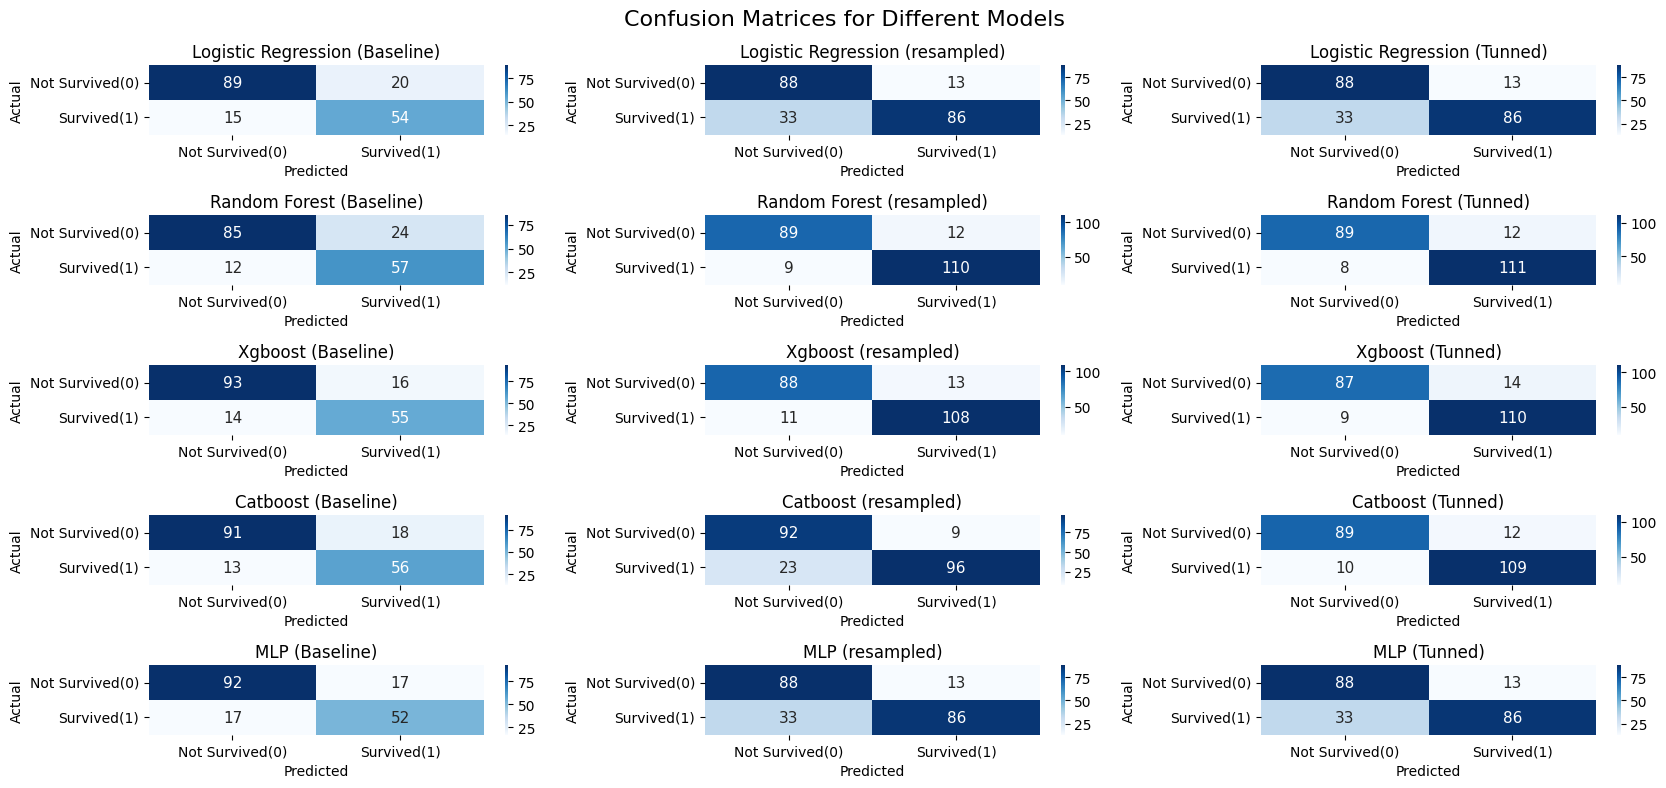

In [54]:
fig, axes = plt.subplots(5, 3, figsize=(17,8))
fig.suptitle('Confusion Matrices for Different Models', fontsize=16)
i = 0
j = 0
for name,model in models.items():
    if "Baseline" in name:
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test,y_pred, labels=[0,1])
    else:
        y_pred_res = model.predict(X_test_res)
        cm = confusion_matrix(y_test_res,y_pred_res, labels=[0,1])

    sns.heatmap(cm, annot=True, fmt="d", annot_kws={'size': 11}, xticklabels=['Not Survived(0)','Survived(1)'], yticklabels=['Not Survived(0)','Survived(1)'], cmap='Blues', ax= axes[i,j])
    axes[i,j].set_title(name)
    axes[i,j].set_xlabel('Predicted')
    axes[i,j].set_ylabel('Actual')
    j += 1
    if j ==  3:
        i += 1
        j = 0
plt.tight_layout()
plt.show()

#### **Key Insights**
- **Best Model:** RandomForest Classifier(Resampled) provides the most accurate and balanced predictions, as reflected by the minimal false negatives and false positives.
- **Effectiveness of Resampling:** Resampling significantly improved the model performance, particularly for Random Forest and XGBoost.
- **Impact of Hyperparameter Tuning:** Tuning further refined the models, particularly boosting models like XGBoost and CatBoost.

**So we finalize the `RandomForest Classifier(Resampled)` Model as Best Model**

### AUC - ROC Curve (For Best Model i.e `Random Forest Classifier`)

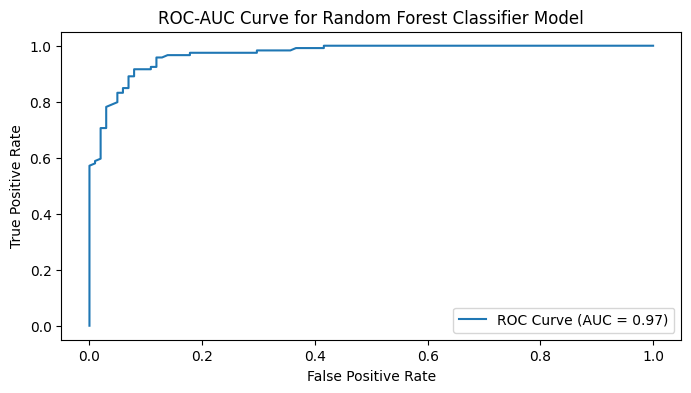

In [55]:
# ROC-AUC Curve
plt.figure(figsize=(8, 4))
y_proba = rf_res.predict_proba(X_test_res)[:, 1]
fpr, tpr, _ = roc_curve(y_test_res, y_proba)
plt.plot(fpr, tpr, label= f"ROC Curve (AUC = {roc_auc_score(y_test_res, y_proba):.2f})")

plt.title("ROC-AUC Curve for Random Forest Classifier Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

## Model Testing (Using Separate Test Dataset)

### Importing and Preparaing Test Data

In [56]:
test_df = pd.read_csv(r'E:\DataPlay\Titanic Survival Prediction\titanic_test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
new_df = test_df.copy()

new_df.drop(columns=['PassengerId','Name','Ticket','Cabin','Pclass','Embarked'], inplace= True)
new_df['Family Size'] =new_df['SibSp']+new_df['Parch']+1
new_df = new_df.drop(columns= ['Parch','SibSp'])
new_df.head()

,Sex,Age,Fare,Family Size
0,male,34.5,7.8292,1
1,female,47.0,7.0000,2
2,male,62.0,9.6875,1
3,male,27.0,8.6625,1
4,female,22.0,12.2875,3


In [58]:
new_df.isnull().sum()

Sex             0
Age            86
Fare            1
Family Size     0
dtype: int64

In [59]:
new_df['Age'].agg(['mean', 'median'])

mean      30.27259
median    27.00000
Name: Age, dtype: float64

In [60]:
new_df['Fare'].agg(['mean', 'median'])

mean      35.627188
median    14.454200
Name: Fare, dtype: float64

In [61]:
new_df['Age'].fillna(new_df['Age'].mean(), inplace= True)
new_df['Fare'].fillna(new_df['Fare'].median(), inplace= True)

In [62]:
new_df.isnull().sum()

Sex            0
Age            0
Fare           0
Family Size    0
dtype: int64

In [63]:
new_df['Sex'] = label_encoding.fit_transform(new_df['Sex'])
new_df.head()

,Sex,Age,Fare,Family Size
0,1,34.5,7.8292,1
1,0,47.0,7.0000,2
2,1,62.0,9.6875,1
3,1,27.0,8.6625,1
4,0,22.0,12.2875,3


### Testing Selected Best Model using Test Dataset

In [64]:
prediction = rf_res.predict(new_df)
print(prediction)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


### Merging predictions into test_df

In [65]:
test_df['Survived'] = prediction
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


### Taking CSV output for Test Dataset with `Prediction` and `PassengerID`

In [66]:
test_df[['PassengerId','Survived']].to_csv(r'Predicted Data.csv', index= False)

## Model Deployment

In [67]:
import pickle

# Save the trained model
model = rf_res
filename = 'rf_res_model.pkl'
pickle.dump(model, open(filename, 'wb'))